# Entropy of a text

In [11]:
from dataset import Dataset
from entropy import Entropy
from probability import *
from word_counter import WordCounter
from scrambler import *
from tqdm.notebook import tqdm
import numpy as np
import matplotlib.pyplot as plt
import random
import concurrent
from IPython.display import display, Markdown
import pandas

In [12]:
def compute_entropy(dataset: Dataset) -> float:
        unigram_counts = WordCounter.count_n_grams(dataset)
        bigram_counts = WordCounter.count_n_grams(dataset, 2)

        unigram_probabilities = Probability()
        bigram_probabilities = Probability()

        unigram_probabilities.compute_probability(unigram_counts)
        bigram_probabilities.compute_probability(bigram_counts)

        conditional_probability = ConditionalProbability()
        conditional_probability.compute_conditional_probability(bigram_probabilities, unigram_probabilities)

        return Entropy.compute_entropy(conditional_probability, dataset)

In [13]:
def get_vocabulary(dataset: Dataset) -> list:
        vocabulary = set()
        for word in dataset:
            vocabulary.add(word)

        return list(vocabulary)

In [14]:
def get_total_number_of_characters(dataset: Dataset) -> int:
    character_sum = 0
    for word in dataset:
        character_sum += len(word)
    return character_sum

In [15]:
def get_average_number_of_characters(dataset: Dataset) -> int:
    character_sums = []
    for word in dataset:
        character_sums.append(len(word))

    return np.mean(character_sums).item()

In [16]:
TEXT_FILE1 = "TEXTEN1.txt"
TEXT_FILE2 = "TEXTCZ1.txt"

In [17]:
dataset1 = Dataset()
dataset1.from_file(TEXT_FILE1)

dataset2 = Dataset()
dataset2.from_file(TEXT_FILE2)

In [18]:
text1_entropy = compute_entropy(dataset1)
text2_entropy = compute_entropy(dataset2)
text1_perplexity = 2 ** text1_entropy
text2_perplexity = 2 ** text2_entropy

display(Markdown("""
# Conditional entropy
| File | Entropy | Perplexity |
|----|-----|-----|
| {0} | {1} | {4} |
| {2} | {3} | {5} |       
""".format(TEXT_FILE1, text1_entropy, TEXT_FILE2, text2_entropy, text1_perplexity, text2_perplexity)))


# Conditional entropy
| File | Entropy | Perplexity |
|----|-----|-----|
| TEXTEN1.txt | 5.287434809406375 | 39.054985216602695 |
| TEXTCZ1.txt | 4.747786261527468 | 26.867427010393396 |       


# Dataset analysis

In [19]:
text1_word_count = len(dataset1)
text2_word_count = len(dataset2)

text1_total_number_of_characters = get_total_number_of_characters(dataset1)
text2_total_number_of_characters = get_total_number_of_characters(dataset2)

text1_avg_number_of_characters = get_average_number_of_characters(dataset1)
text2_avg_number_of_characters = get_average_number_of_characters(dataset2)

text1_word_counts = WordCounter.count_n_grams(dataset1)
text2_word_counts = WordCounter.count_n_grams(dataset2)

text1_vocabulary_size = len(get_vocabulary(dataset1))
text2_vocabulary_size = len(get_vocabulary(dataset2))

text1_least_common_words_count = 0
for _, count in text1_word_counts.most_common():
    if count == 1:
        text1_least_common_words_count += 1

text2_least_common_words_count = 0
for _, count in text2_word_counts.most_common():
    if count == 1:
        text2_least_common_words_count += 1

display(Markdown("""
# Conditional entropy
| File | Word count | Total number of characters | Average numbers of characters per word | Vocabulary size | Number of words of frequency 1 |
|----|-----|-----|-----|-----|-----|
| {0} | {2} | {4} | {6} | {8} | {10} |
| {1} | {3} | {5} | {7} | {9} | {11} |
""".format(TEXT_FILE1, 
           TEXT_FILE2,
            text1_word_count, 
            text2_word_count, 
            text1_total_number_of_characters, 
            text2_total_number_of_characters,
            text1_avg_number_of_characters,
            text2_avg_number_of_characters,
            text1_vocabulary_size,
            text2_vocabulary_size,
            text1_least_common_words_count,
            text2_least_common_words_count)))


# Conditional entropy
| File | Word count | Total number of characters | Average numbers of characters per word | Vocabulary size | Number of words of frequency 1 |
|----|-----|-----|-----|-----|-----|
| TEXTEN1.txt | 221100 | 972927 | 4.400393487109905 | 9608 | 3811 |
| TEXTCZ1.txt | 222414 | 1030641 | 4.633885456850738 | 42827 | 26315 |


In [20]:
markdown = """
# Most common words for {0}
| Word | Count |
|----|-----|
""".format(TEXT_FILE1)
for (word,), count in  text1_word_counts.most_common(20):
    markdown += f"| {word} | {count} |\n"

display(Markdown(markdown))


# Most common words for TEXTEN1.txt
| Word | Count |
|----|-----|
| , | 14721 |
| the | 13299 |
| of | 9368 |
| . | 5645 |
| and | 5537 |
| in | 4761 |
| to | 4548 |
| a | 3132 |
| that | 2637 |
| ; | 2151 |
| have | 2084 |
| be | 2072 |
| as | 2056 |
| is | 2032 |
| species | 1779 |
| which | 1762 |
| by | 1703 |
| are | 1621 |
| or | 1607 |
| for | 1346 |


In [21]:
markdown = """
# Most common words for {0}
| Word | Count |
|----|-----|
""".format(TEXT_FILE2)
for (word,), count in  text2_word_counts.most_common(20):
    markdown += f"| {word} | {count} |\n"

display(Markdown(markdown))


# Most common words for TEXTCZ1.txt
| Word | Count |
|----|-----|
| , | 13788 |
| . | 12931 |
| a | 4486 |
| v | 4043 |
| : | 3434 |
| se | 3378 |
| na | 2646 |
| - | 2549 |
| " | 2506 |
| ) | 1761 |
| ( | 1748 |
| že | 1696 |
| je | 1457 |
| o | 1431 |
| s | 1162 |
| z | 1060 |
| do | 987 |
| i | 985 |
| to | 970 |
| 1 | 881 |


We can see that in both datasets the most common words are stop words and punctuation. Also, Czech has bigger vocabulary than English and also Czech has higher proportion of words which have frequence of 1 to the whole vocabulary. The Czech dataset also has more words and the words are on average longer than the English ones.

## Messing up the characters

In [22]:
LIKELIHOODS = [0.1, 0.05, 0.01, 0.001, 0.0001, 0.00001]
RUNS = 10

In [23]:
def character_mess_up(dataset):
    results = []
    for likelihood in tqdm(LIKELIHOODS, "Running for different likelihoods"):
        results_for_run = []
        for run in tqdm(range(RUNS), "Running for several times", leave=False):
            random.seed(42)
            word_scrambler = WordScrambler(likelihood, dataset)
            scrambled_dataset = word_scrambler.scramble_text()
            results_for_run.append(compute_entropy(scrambled_dataset))
        results.append(results_for_run)
    return results

In [24]:
with concurrent.futures.ThreadPoolExecutor(max_workers=4) as executor:
    futures = [executor.submit(lambda: character_mess_up(dataset1)), executor.submit(lambda: character_mess_up(dataset2))]
    concurrent.futures.wait(futures)

Running for different likelihoods:   0%|          | 0/6 [00:00<?, ?it/s]

Running for different likelihoods:   0%|          | 0/6 [00:00<?, ?it/s]

Running for several times:   0%|          | 0/10 [00:00<?, ?it/s]

Running for several times:   0%|          | 0/10 [00:00<?, ?it/s]

Running for several times:   0%|          | 0/10 [00:00<?, ?it/s]

Running for several times:   0%|          | 0/10 [00:00<?, ?it/s]

Running for several times:   0%|          | 0/10 [00:00<?, ?it/s]

Running for several times:   0%|          | 0/10 [00:00<?, ?it/s]

Running for several times:   0%|          | 0/10 [00:00<?, ?it/s]

Running for several times:   0%|          | 0/10 [00:00<?, ?it/s]

Running for several times:   0%|          | 0/10 [00:00<?, ?it/s]

Running for several times:   0%|          | 0/10 [00:00<?, ?it/s]

Running for several times:   0%|          | 0/10 [00:00<?, ?it/s]

Running for several times:   0%|          | 0/10 [00:00<?, ?it/s]

In [25]:
results1 = futures[0].result()
results2 = futures[1].result()

average_entropy1 = np.mean(results1, axis=1)
min_entropy1 = np.min(results1, axis=1)
max_entropy1 = np.max(results1, axis=1)

average_entropy2 = np.mean(results2, axis=1)
min_entropy2 = np.min(results2, axis=1)
max_entropy2 = np.max(results2, axis=1)

In [26]:
display(Markdown(f"# Min, average and max entropies after character mess up for {TEXT_FILE1}"))
fr = pandas.DataFrame([min_entropy1, average_entropy1, max_entropy1], columns=LIKELIHOODS, index=["Min", "Average", "Max"])
fr

# Min, average and max entropies after character mess up for TEXTEN1.txt

,0.10000,0.05000,0.01000,0.00100,0.00010,0.00001
Min,4.724144,5.051145,5.249080,5.283178,5.286748,5.287305
Average,4.731997,5.057154,5.251069,5.283879,5.287001,5.287419
Max,4.737850,5.061103,5.252788,5.284460,5.287214,5.287511


In [27]:
display(Markdown(f"# Min, average and max entropies after character mess up for {TEXT_FILE2}"))
fr = pandas.DataFrame([min_entropy2, average_entropy2, max_entropy2], columns=LIKELIHOODS, index=["Min", "Average", "Max"])
fr

# Min, average and max entropies after character mess up for TEXTCZ1.txt

,0.10000,0.05000,0.01000,0.00100,0.00010,0.00001
Min,4.000284,4.333890,4.656469,4.738477,4.746668,4.74759
Average,4.005146,4.337664,4.658045,4.739013,4.746729,4.74759
Max,4.014213,4.342065,4.660728,4.739573,4.746898,4.74759


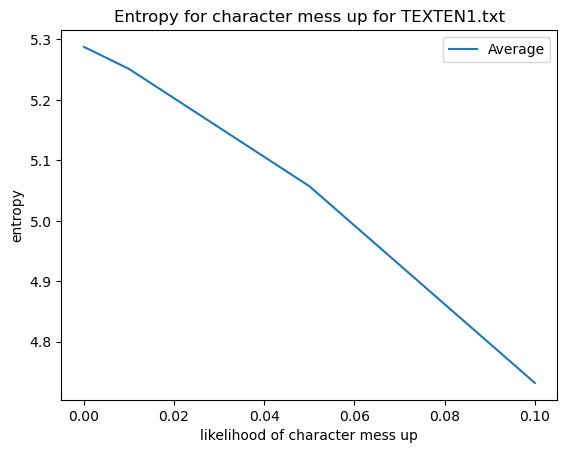

In [28]:
plt.plot(LIKELIHOODS, average_entropy1)

plt.title("Entropy for character mess up for TEXTEN1.txt")
plt.xlabel("likelihood of character mess up")
plt.ylabel("entropy")
plt.legend(["Average"])

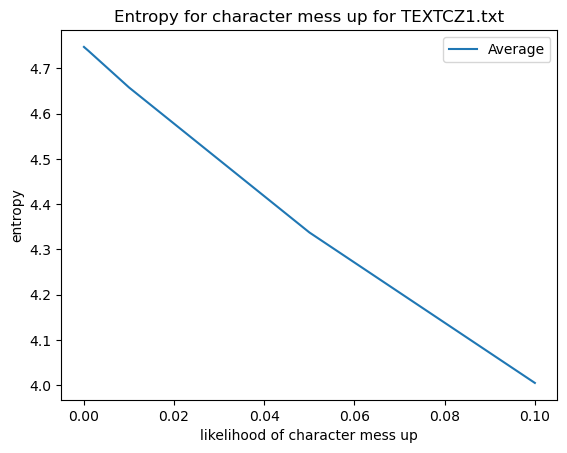

In [29]:
plt.plot(LIKELIHOODS, average_entropy2)

plt.title("Entropy for character mess up for TEXTCZ1.txt")
plt.xlabel("likelihood of character mess up")
plt.ylabel("entropy")
plt.legend(["Average"])

The graphs suggest that increasing the likelihood of character mess up decreases the entropy. This is because the operation of messing up a character actually increases the vocabulary and therefore every word pair is more unique making it easier to predict. 

## Messing up the words

In [30]:
LIKELIHOODS = [0.1, 0.05, 0.01, 0.001, 0.0001, 0.00001]
RUNS = 10
results = []

In [31]:
def word_mess_up(dataset: Dataset):
    results = []
    for likelihood in tqdm(LIKELIHOODS, "Running for different likelihoods"):
        results_for_run = []
        for run in tqdm(range(RUNS), "Running for several times", leave=False):
            random.seed(42)
            word_scrambler = TextScrambler(likelihood, dataset)
            scrambled_dataset = word_scrambler.scramble_text()
            results_for_run.append(compute_entropy(scrambled_dataset))
        results.append(results_for_run)
    return results

In [32]:
with concurrent.futures.ThreadPoolExecutor(max_workers=4) as executor:
    futures = [executor.submit(lambda: word_mess_up(dataset1)), executor.submit(lambda: word_mess_up(dataset2))]
    concurrent.futures.wait(futures)

Running for different likelihoods:   0%|          | 0/6 [00:00<?, ?it/s]

Running for different likelihoods:   0%|          | 0/6 [00:00<?, ?it/s]

Running for several times:   0%|          | 0/10 [00:00<?, ?it/s]

Running for several times:   0%|          | 0/10 [00:00<?, ?it/s]

Running for several times:   0%|          | 0/10 [00:00<?, ?it/s]

Running for several times:   0%|          | 0/10 [00:00<?, ?it/s]

Running for several times:   0%|          | 0/10 [00:00<?, ?it/s]

Running for several times:   0%|          | 0/10 [00:00<?, ?it/s]

Running for several times:   0%|          | 0/10 [00:00<?, ?it/s]

Running for several times:   0%|          | 0/10 [00:00<?, ?it/s]

Running for several times:   0%|          | 0/10 [00:00<?, ?it/s]

Running for several times:   0%|          | 0/10 [00:00<?, ?it/s]

Running for several times:   0%|          | 0/10 [00:00<?, ?it/s]

Running for several times:   0%|          | 0/10 [00:00<?, ?it/s]

In [33]:
results1 = futures[0].result()
results2 = futures[1].result()

average_entropy1 = np.mean(results1, axis=1)
min_entropy1 = np.min(results1, axis=1)
max_entropy1 = np.max(results1, axis=1)

average_entropy2 = np.mean(results2, axis=1)
min_entropy2 = np.min(results2, axis=1)
max_entropy2 = np.max(results2, axis=1)

In [34]:
display(Markdown(f"# Min, average and max entropies after word mess up for {TEXT_FILE1}"))
fr = pandas.DataFrame([min_entropy1, average_entropy1, max_entropy1], columns=LIKELIHOODS, index=["Min", "Average", "Max"])
fr

# Min, average and max entropies after word mess up for TEXTEN1.txt

,0.10000,0.05000,0.01000,0.00100,0.00010,0.00001
Min,5.455261,5.376520,5.306435,5.289017,5.287505,5.287387
Average,5.458372,5.379342,5.307452,5.289211,5.287678,5.287455
Max,5.462088,5.382326,5.309006,5.289687,5.287820,5.287486


In [35]:
display(Markdown(f"# Min, average and max entropies after word mess up for {TEXT_FILE2}"))
fr = pandas.DataFrame([min_entropy2, average_entropy2, max_entropy2], columns=LIKELIHOODS, index=["Min", "Average", "Max"])
fr

# Min, average and max entropies after word mess up for TEXTCZ1.txt

,0.10000,0.05000,0.01000,0.00100,0.00010,0.00001
Min,4.633055,4.699418,4.738770,4.746785,4.747515,4.747777
Average,4.638738,4.701520,4.740201,4.747328,4.747705,4.747777
Max,4.644391,4.704648,4.741803,4.747763,4.747813,4.747777


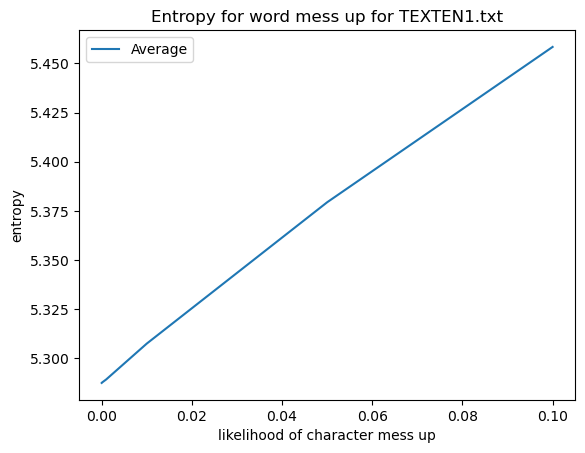

In [36]:
plt.plot(LIKELIHOODS, average_entropy1)

plt.title("Entropy for word mess up for TEXTEN1.txt")
plt.xlabel("likelihood of character mess up")
plt.ylabel("entropy")
plt.legend(["Average"])

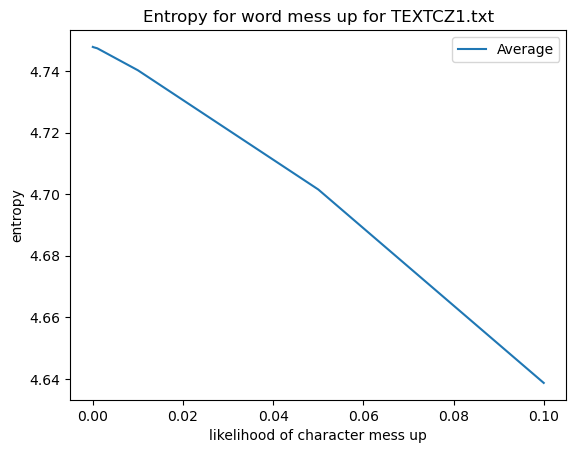

In [37]:
plt.plot(LIKELIHOODS, average_entropy2)

plt.title("Entropy for word mess up for TEXTCZ1.txt")
plt.xlabel("likelihood of character mess up")
plt.ylabel("entropy")
plt.legend(["Average"])

In word mess up we find that for TEXTEN1.txt with increasing likelihood of word mess up the entropy also increases but in the case of TEXTCZ1.txt the entropy decreases. In this case the operation of word mess up does not increase the vocabulary but potentially it can decrease the size of vocabulary. It also makes word pairs less ambiguous because by messing up a word and mapping it to a word that is present in the text we increase its frequence making it harder to predict. This is especially case for English text which has small vocabulary and small proportion of less frequent words so during the mess up process a word with higher frequency is more likely to be selected, increasing its frequency even more and therefore making it harder to predict which increases the entropy. In the case of Czech, the vocabulary is bigger and the proportion of less frequent words is much higher. Therefore, the probability of picking a less frequent word for word mess up is much higher and this way we can switch a very frequent word during for a much less frequent word making the word pair easier to predict and, therefore, decreasing the entropy.